<a href="https://colab.research.google.com/github/jrcendagorta/Convolution_NN/blob/master/Convolution_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import cifar10

%matplotlib inline
tf.__version__

'2.2.0'

In [2]:
# Load and preprocess data

#Setting class names for the dataset
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
#Loading the dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Normalize Images [0,1]
X_train = X_train / 255.0
X_test = X_test / 255.0

170500096/170498071 [==============================] - 2s 0us/step


In [6]:
# Model Generation
# Currently produces 79% error
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation="relu", padding="same", input_shape=[32, 32, 3]))
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation="relu", padding="same"))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2,  padding='valid'))
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu', padding="same"))
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu', padding="same"))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))
model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu', padding="same"))
model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu', padding="same"))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(units=256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(units=128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(units=10, activation='softmax'))
model.summary()
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=["sparse_categorical_accuracy"])
history = model.fit(X_train, y_train, epochs=100,validation_data=(X_test, y_test),batch_size=1000)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
dropout_10 (Dropout)         (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
dropout_11 (Dropout)         (None, 16, 16, 64)       

In [7]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.8711 - sparse_categorical_accuracy: 0.7905


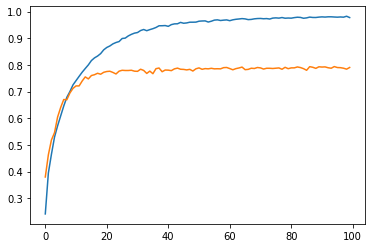

In [9]:
plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])